# Theoretical Part

## Exercise 1

### (a)

The given probability **Pr($\mathbf{m_{th}}$ experiment gives significant result | m experiments lacking power to reject $\mathbf{H_0}$)** expresses the chance that at the $m_{th}$ experiment, a Type I Error occurs, given that m experiments were conducted for which the null hypothesis was true and was not rejected for the first m-1.  


This probability is related to the Type I error. Type I Error is the significance level for a given hypothesis test, which is a numeric value between 0 and 1 for which we accept or reject the null hypothesis. If for a particular experiment the P-value is less or equal to the Type I error Value, then it can be considered statistically insignificant. This value is denoted with $\alpha$. 

With that said, the probability of a single experiment to have a Type I Error is equal to $\alpha$. Consequently, the probability of a single experiment **not** to have a Type I Error is equal to the complement of the latter probability which is equal to *1-$\alpha$*. Thus:


<center> Pr(experiment giving significant results when $\mathbf H_0$ is true) = $\alpha$ </center>
<center> Pr(experiment lacking power to reject $\mathbf H_0$) = $(1-\alpha)$ </center>


Having m statistically independent experiments occurring in sequence, we can conclude that:

<center> Pr(m experiments lacking power to reject $\mathbf H_0$) = $(1-\alpha)^m$ </center>

Also:

<center> Pr( $\mathbf{m_{th}}$ experiment gives significant result | m-1 experiments lacking power to reject $\mathbf H_0$) = $\alpha(1-\alpha)^{m-1}$ </center>

The probability is the product of the probability $m_{th}$ experiment giving significant result once (i.e. $\alpha$) with the probability of m-1 experiments lacking power to reject the null hypothesis (i.e. $(1-\alpha)^{m-1}$). We notice that this probability is at its maximum with value a for m=1.

### (b)
**P(at least one significant result | m experiments lacking power to reject $\mathbf H_0$)** expresses the chance that at least one experiment (amongst m conducted experiments) has a significant result given that the null hypothesis in each of the experiments is true. This can be differently expressed as 1 minus the probability of its complement which is the probability of all of the m experiments lacking the power to reject their true null hypotheses. Thus, this can be seen as:

<center> 1 - Pr(m experiments lacking power to reject $\mathbf H_0$) </center>

The latter probability can be easily calculated by the probability of a single experiment lacking power to reject $H_0$ to the power of m, as it was shown in question 1a. Thus, the probability that we are looking for is expressed as:

<center> Pr(at least one significant result | m experiments lacking power to reject $\mathbf H_0$) = $1 -  ( 1- \alpha)^m$  </center>

We can observe that the higher the m, the higher the probability is to have at least one significant result.

## Exercise 2
As shown in the class Balanced Interleaving can be biased towards upon two rankings A and B, if these rankings are very similar. Usually, this occurs if there is a small shift between the similar rankings or if there an addition. Team-Draft Interleaving (TDI) is __able to address this problem__ by assigning equal number of documents to ranking A and B during the creation of all the interleaved rankings. 

Even though TDI is able to overcome the bias that Balanced Interleaving poses, it is not able to detect differences in the quality of ranking. This problem occurs when a user click is correlated to the relevance of a clicked document. In order to illustrate this bias, let's assume that we have a pair of rankings $l_1$ and $l_2$, each of which is a list of 3 ranked documents. The following table shows these two ranked lists of 3 elements:

| List $l_1$ | List $l_2$ |
|:-----:|:-----:|
| <font color='red'>$d_1$</font> | <font color='blue'>$d_2$</font> |
| <font color='red'>$d_2$</font> | <font color='blue'>$d_3$</font> |
| <font color='red'>$d_3$</font> | <font color='blue'>$d_4$</font> |

TDI upon $l_1$ and $l_2$ generates 4 possible interleaved lists {$I_1, I_2, I_3, I_4$} which are the following:



| Interleaving $I_1$ | Interleaving $I_2$ | Interleaving $I_3$ | Interleaving $I_4$ |
|:-----:|:-----:|:-----:|:-----:|
| <font color='red'>$d_1$</font> | <font color='red'>$d_1$</font> | <font color='blue'>$d_2$</font> | <font color='blue'>$d_2$</font> |
| <font color='blue'>$d_2$</font> | <font color='blue'>$d_2$</font> | <font color='red'>$d_1$</font> | <font color='red'>$d_1$</font> |
| <font color='red'>$d_3$</font> | <font color='blue'>$d_3$</font> | <font color='red'>$d_3$</font> | <font color='blue'>$d_3$</font> |

A red coloured document means that it is assigned to $l_1$ and the blue color indicates assignment to $l_2$.

We can see that a random distribution of clicks over all the interleaved lists does prefer both of $l_1$ and $l_2$. However, let's assume that document $d_3$ is the only relevant one in our list. Therefore, we assume that the click distribution is not even upon all documents, and document $d_3$ is more likely to be clicked. 

Moreover, we notice that document $d_3$ is placed by TDI in the $3^{rd}$ rank in all interleaved lists. This is done evenly, meaning that two interleaved lists assigned $d_3$ to $l_1$ and the other two assigned it to $l_2$. Thus, it is expected that both of the rankings will receive the same amount of wins for this document. This is unfair to the algorithm which produced $l_2$ due to the fact that $l_2$ positions $d_3$ in a higher rank than $l_1$ does. Clearly, $l_2$ should have more probabilities and this shows that TDI is not sensitive to the quality of ranking and does not identify this issue.


# Experimental Part 

In [1]:
import pyndri
from itertools import product
import random
import math
from numpy import prod
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import binom_test
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from pylab import polyfit, poly1d

One can reproduce random results by setting the <font color='red'>use_seed</font> flag to True.

In [2]:
use_seed = False
seed = 0

## Step 1:  Simulate Rankings of Relevance for E and P

All the possible ranking pairs can be created through the <font color='blue'>Ranking Pairs</font> class. You can specify the grades of relevance with a list of literal (e.g. [<font color='red'>'N', 'R', 'HR'</font>]) and the length of each list in the pair with an integer value. These two are arguments of the constructor.

After creating a RankingPairs object, one can retrieve the whole list through the class method <font color='blue'>get_pairs()</font>. Also, one can get a random pair throught the class method <font color='blue'>random_pair()</font>.

In [3]:
class RankingPairs:
    def __init__(self, grades = ['N', 'R', 'HR'], length=5):
        """RankingPairs constructor.

        Keyword arguments:
        grades -- a list of literals that represent the grades of relevance. (default ['N', 'R', 'HR'])
        length -- the length of each pair (default 5)
        """
        self.grades = grades
        self.length = length
        self.pairs = [x for x in product(product(self.grades, repeat=5), repeat=2)]
        
    def get_pairs(self):
        """Return the ranking pairs list."""
        return self.pairs
    
    def random_pair(self):
        """Choose a random element from the pairs list and return it."""
        # Sets seed in order to reproduce random choice.
        if use_seed:
            random.seed(seed)
        return random.choice(self.pairs)
        

In [4]:
# Create ranking pairs of length 5 with grades of relevance of N, R, HR
grades = ['N', 'R', 'HR']
length = 5
ranking_pairs = RankingPairs(grades, length)

# Length of ranking pairs
print("Created {0} ranking pairs in total.".format(len(ranking_pairs.get_pairs())))

# Getting a random pair
(P, E) = ranking_pairs.random_pair()

print("P: {0}".format(P))
print("E: {0}".format(E))

Created 59049 ranking pairs in total.
P: ('HR', 'N', 'R', 'N', 'HR')
E: ('N', 'N', 'R', 'R', 'N')


## Step 2: Implement Evaluation Measures

The evaluation measures that we have implemented are:

1. Precision at rank k
2. Normalized Discounted Cumulative Gain at rank k (nDCG@k)
3. Expected Reciprocal Rank (ERR)


The following method implements precision@k. Precision@k is a binary evaluation measure, there we treat the ranking grades 'HR' and 'R' as of the same grade of relevance.

In [5]:
def precision_k(ranking, k=5):
    """Return the precision at rank k of a retrieved ranked document list.
    
    Keyword arguments:
    ranking -- a list of ranked documents
    k -- the precision rank (default 5)
    """
    TP = len([doc for doc in ranking[:k] if doc == 'R' or doc == 'HR'])
    FP = len([doc for doc in ranking[:k] if doc == 'N'])
    precision = TP/(TP+FP)
    return precision

The following method implements nDCG@k.

In [6]:
def nDCGk(ranking, k = 5, gains={'HR':5, 'R':1, 'N':0}):
    """Return the normalized discounted cummulative gain at rank k of given ranking.
    
    Keyword arguments:
    ranking -- a list of ranked documents
    k -- the rank for which the nDCG will be calculated (default 5)
    gains -- a dictionary of the graded relevance values; keys are relevance tags
             and values are the numeric graded relevance (default {'HR':5, 'R':1, 'N':0})
    """
    
    # lambda function for each term in the sum calculation
    term = lambda x, y : (2**x - 1) / math.log2(1+y)
    # Calculation of DCG@k
    DCGk = sum([term(gains[r], index+1) for index, r in enumerate(ranking[:k])])
    # Calculation of best possible DCG@k
    IDCGk = sum([(2**gains['HR'] - 1) / math.log2(1+i) for i in range(k+1)[1:]])
    # Calculation of nDCG@k
    nDCGk = DCGk / IDCGk
    return nDCGk

The following method implements ERR.

Algorithm taken from [Chapelle, O., Metlzer, D., Zhang, Y., & Grinspan, P. (2009, November). Expected reciprocal rank for graded relevance. In Proceedings of the 18th ACM conference on Information and knowledge management (pp. 621-630). ACM.](https://pdfs.semanticscholar.org/7e3c/f6492128f915112ca01dcb77c766129e65cb.pdf)

In [7]:
def ERR(ranking, gains={'HR':5, 'R':1, 'N':0}):   
    """Return the Expected Reciprocal Rank (ERR) of given ranking.
    
    Keyword arguments:
    ranking -- a list of ranked documents
    gains -- a dictionary of the graded relevance values; keys are relevance tags
             and values are the numeric graded relevance (default {'HR':5, 'R':1, 'N':0})
    """
    
    # Calculate parameters
    maxrel = gains['HR']
    n = len(ranking)
    theta = lambda rel : (2**rel - 1)/2**maxrel
    
    # Initialize variables
    p = 1
    ERR = 0
    
    # Calculate ERR
    for r in range(1,n+1):
        R = theta(gains[ranking[r-1]])
        ERR += p*R/r
        p *= (1-R)
    return ERR 

Here are some tests upon a random pair, for the implemented evaluation measures:

In [8]:
# Get a random ranking pair
(P, E) = ranking_pairs.random_pair()
print("Evaluation metrics for:\nP: {0}\nE: {1}.".format(P, E))
print()

# Calculating precision
print("===== Precision@k for k in [1,2,3,4,5] =====")
for k in range(1,6):
    print("Precision@{0} for algorithm P is {1}.".format(k, precision_k(P, k=k)))
    print("Precision@{0} for algorithm E is {1}.".format(k, precision_k(E, k=k)))
print()

# Calculating nDCG@k
# ...but first define a dictionary for the numeric graded relevance gains.
gains = {'HR':5, 'R':1, 'N':0}

print("===== nDCG@k for k in [1,2,3,4,5] =====")
for k in range(1, 6):
    print("nDCG@{0} for algorithm P is {1}.".format(k, nDCGk(P, k=k, gains=gains)))
    print("nDCG@{0} for algorithm E is {1}.".format(k, nDCGk(E, k=k, gains=gains)))
print()

print("===== ERR =====")
print("ERR for algorithm P is {0}.".format(ERR(P, gains=gains)))
print("ERR for algorithm E is {0}.".format(ERR(E, gains=gains)))

Evaluation metrics for:
P: ('N', 'R', 'R', 'R', 'HR')
E: ('N', 'N', 'N', 'HR', 'HR').

===== Precision@k for k in [1,2,3,4,5] =====
Precision@1 for algorithm P is 0.0.
Precision@1 for algorithm E is 0.0.
Precision@2 for algorithm P is 0.5.
Precision@2 for algorithm E is 0.0.
Precision@3 for algorithm P is 0.6666666666666666.
Precision@3 for algorithm E is 0.0.
Precision@4 for algorithm P is 0.75.
Precision@4 for algorithm E is 0.25.
Precision@5 for algorithm P is 0.8.
Precision@5 for algorithm E is 0.4.

===== nDCG@k for k in [1,2,3,4,5] =====
nDCG@1 for algorithm P is 0.0.
nDCG@1 for algorithm E is 0.0.
nDCG@2 for algorithm P is 0.012479122814017472.
nDCG@2 for algorithm E is 0.0.
nDCG@3 for algorithm P is 0.017120041096040112.
nDCG@3 for algorithm E is 0.0.
nDCG@4 for algorithm P is 0.01966515967767414.
nDCG@4 for algorithm E is 0.16812753627111748.
nDCG@5 for algorithm P is 0.1482900683902141.
nDCG@5 for algorithm E is 0.2772734273550483.

===== ERR =====
ERR for algorithm P is 0.20

## Step 3: Calculate the Δmeasure

In [9]:
def delta_measure(ranking_pairs, prec_k=5, ndcg_k=5):
    """ Delta measures for Precision@k, nDCG@k, ERR upon P and E ranking pairs. 
    
    Keyword arguments:
    ranking_pairs -- A tuple with first element the ranking of P and second element the ranking of E.
    prec_k -- the precision rank (default 5)
    ndcg_k -- the rank for which the nDCG will be calculated (default 5)
    """
    delta_precisionk = [precision_k(E, k=prec_k) - precision_k(P, k=prec_k) for P, E in ranking_pairs.get_pairs()]
    delta_ndcgk = [nDCGk(E, k=ndcg_k) - nDCGk(P, k=ndcg_k) for P, E in ranking_pairs.get_pairs()]
    delta_err = [ERR(E) - ERR(P) for P, E in ranking_pairs.get_pairs()]
    
    return delta_precisionk, delta_ndcgk, delta_err

Calculate the delta measure for Precision@k, nDCG@k, ERR upon P and E ranking pairs:

In [10]:
prec_k = 5
ndcg_k = 5
precisionk_delta, ndcgk_delta, err_delta = delta_measure(ranking_pairs, prec_k=prec_k, ndcg_k=ndcg_k)

In [11]:
# An example
index = 2500
prec_k = 5
ndcg_k = 5
print("Δmeasure for:\nP: {0} and E: {1}".format(ranking_pairs.get_pairs()[index][0], ranking_pairs.get_pairs()[index][1]))
print()
print("Precision@5 Δmeasure: {0}".format(precisionk_delta[index]))
print("nDCG@5 Δmeasure: {0}".format(ndcgk_delta[index]))
print("ERR Δmeasure: {0}".format(err_delta[index]))

Δmeasure for:
P: ('N', 'N', 'R', 'N', 'R') and E: ('N', 'HR', 'R', 'HR', 'R')

Precision@5 Δmeasure: 0.4
nDCG@5 Δmeasure: 0.36005461457723403
ERR Δmeasure: 0.4755669275919596


## Step 4: Implement Interleaving

It is assumed that the two ranking lists that are going to be interleaved contained different documents and no document appears twice.

In [12]:
class TeamDraftInterleaving:
    def __init__(self, rankingsA, rankingsB):
        """Create a Team-Draft Interleaving object.
        
        Keyword arguments:
        rankingsA -- The first graded ranked list of documents.
        rankingsB -- The second graded ranked list of documents.
        """
        self.A = rankingsA
        self.B = rankingsB
        self.TeamA = []
        self.TeamB = []
        self.I = []
        self.interleave()
        self.scoreA = self.scoreB = None
        
    def interleave(self):
        """Interleave the two ranking lists."""
        indexA = 0
        indexB = 0
        for i in range(len(self.A) + len(self.B)):
            if(use_seed):
                random.seed(seed)
            rand_bit = bool(random.getrandbits(1))
            if(len(self.TeamA) < len(self.TeamB) or
              (len(self.TeamA) == len(self.TeamB) and
               rand_bit)):
                self.I.append(self.A[indexA])
                indexA += 1
                self.TeamA.append(i)
            else:
                self.I.append(self.B[indexB])
                indexB += 1
                self.TeamB.append(i)
    
    def get_interleaving(self):
        """Return interleaved list."""
        return self.I
    
    def credit_clicks(self, clicks):
        """Evaluate scores according to given user clicks.
        
        Keyword arguments:
        clicks -- a list of clicks consisting of 0s and 1s. 1 is click and 0 is no-click.
        """
        # Some error checking
        for click in clicks:
            if click not in [False, True]:
                raise RuntimeError("bad format of 'clicks'")
        if len(clicks) != len(self.I):
                raise RuntimeError("bad format of 'clicks'")
        # Evaluate scores
        self.scoreA = 0
        self.scoreB = 0
        for i in range(len(self.I)):
            if clicks[i] == True:
                if i in self.TeamA:
                    self.scoreA += 1
                else:
                    self.scoreB += 1
    
    def get_scores(self):
        """Return a tuple of scores for Team A and Team B."""
        if self.scoreA == self.scoreB == None:
            raise RuntimeError("cannot call 'get_scores' before giving clicks.")
        return self.scoreA, self.scoreB

Example of Team-Draft Interleaving.:

In [13]:
clicks = [True,False,False,True,True,False,False,False,False,False]
tdi = TeamDraftInterleaving(P, E)
tdi.credit_clicks(clicks)
scoreP, scoreE = tdi.get_scores()
print("Score of P{0} is: {1}".format(P, scoreP))
print("Score of E{0} is: {1}".format(E, scoreE))

Score of P('N', 'R', 'R', 'R', 'HR') is: 1
Score of E('N', 'N', 'N', 'HR', 'HR') is: 2


## Step 5: Implement User Clicks Simulation

### 5.1: Analysis, assumptions and preprocessing of the Yandex dataset.

Here we open the Yandex dataset and present the first two sessions chunks

In [14]:
names = ['SessionID', 'TimePassed', 'TypeOfAction', 'QueryID', 'RegionID',
         'url1', 'url2', 'url3', 'url4', 'url5', 'url6', 'url7', 'url8', 'url9', 'url10']
data = pd.read_csv('YandexRelPredChallenge.txt', sep='\t', header=None, names=names)
data.loc[0:15]

,SessionID,TimePassed,TypeOfAction,QueryID,RegionID,url1,url2,url3,url4,url5,url6,url7,url8,url9,url10
0,0,0,Q,8,0.0,7.0,103.0,51.0,92.0,43.0,12.0,73.0,69.0,27.0,105.0
1,0,36,Q,174,0.0,1625.0,1627.0,1623.0,1626.0,1624.0,1622.0,1619.0,1621.0,1620.0,1618.0
2,0,50,Q,227,0.0,2094.0,2091.0,2087.0,2089.0,2093.0,2088.0,2090.0,2092.0,2095.0,2086.0
3,0,515,Q,174,0.0,1625.0,1627.0,1623.0,1626.0,1624.0,1622.0,1619.0,1621.0,1620.0,1618.0
4,0,524,Q,1974,0.0,17562.0,1627.0,1626.0,1623.0,2091.0,17559.0,17563.0,17558.0,17561.0,17560.0
5,0,527,C,17562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,528,C,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,529,C,1626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0,Q,9,0.0,13.0,70.0,66.0,94.0,50.0,104.0,29.0,21.0,89.0,85.0
9,1,20,C,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Assumptions
After analysing the data we observed that within each session there are occurences of the same query more than one time. This means that our dataset holds information about multi-queried sessions. For that reason we make the following assumptions:
1. If a query appears more than once in a session with a partially different ranked list of documents, then they are treated as different queries.
2. If a query appears more than once in a session with exactly the same ranked list of documents, then they are treated as different queries.
3. If a query appears more than once in a session with totally different ranked lists of documents, then they are are merged into a single query with all the documents included. This is handling pagination.

Furthermore, we assign each click to a query in the following way:
1. Sort the queries by the time that they were posed. The sorting is from the most recent query to the first query. The final list looks like {$t_n, t_{n-1}, ..., t_2, t_1$} for the n queries belonging to the session.
2. Retrieve the time that a click occurred $t_k$.
3. Iterate over the reverse sorted list of queries and if $t_k >= t_i, \forall i \in {n,...,1}$ then assign this click to the $i^{th}$ query. 

#### Session class
The Session object holds all the information related to a single session. 
Attributes:
1. **self.sid** := The ID of the session.
2. **self.pagination_count** := The count of pagination occurrences.
3. **self.duplicate_count** := The count of duplicate query occurrences.
4. **self.session_queries** := A dictionary of Query objects. Key is a unique id and value is a Query object.


In [15]:
class Session():
    def __init__(self, chunk):
        """Constructor of a Session object
        
        keyword arguments:
        chunk -- a dataframe containing all the data related to a single session
        """
        self.sid = chunk.reset_index()['SessionID'][0]
        queries = chunk.loc[chunk['TypeOfAction'] == 'Q']
        clicks = chunk.loc[chunk['TypeOfAction'] == 'C']
        self.pagination_count = 0
        self.duplicate_count = 0
        self.session_queries = {}
        self.store_queries_and_clicks(queries, clicks)
    
    def store_queries_and_clicks(self, queries, clicks):
        """Creates the Query and Click objects and stores them in the Session.
        
        keyword arguments:
        queries -- a dataframe containing the session query data (chunk['TypeOfAction] == 'Q')
        clicks -- a dataframe containig the session click data (chunk['TypeOfAction'] == 'C')
        """
        seen_queries = []
        unique_id = 0
        p1 = 0
        p2 = 0
        # Store queries
        for _, q in queries.iterrows():
            qid = q[3]
            documents = q[5:15]
            store = True
            if qid in seen_queries:
                self.duplicate_count += 1
                for k, v in self.session_queries.items():
                    if v.getID() == qid and v.get_docs() == documents.tolist():
                        self.session_queries[k].pagination(q)
                        self.pagination_count += 1
                        store = False
            if(store):
                seen_queries.append(qid)
                self.session_queries[unique_id] = Query(q)
                unique_id += 1
        
        # First, get a sorted timeline of the queries
        timeline = {}
        for k, q in self.session_queries.items():
            time = q.get_time()
            
            if len(time) > 1:
                for t in time:
                    timeline[t] = k
            else:
                timeline[time[0]] = k
        timeline = dict(sorted(timeline.items(), reverse=True))
            
        # Store clicks
        for _, click in clicks.iterrows():
            click_time = click[1]
            clicked_doc = click[3]
            # Find query of click event
            for k, v in timeline.items():
                added = False
                if click_time >= k and self.session_queries[v].contains(clicked_doc):
                    rank = self.session_queries[v].get_docs().index(click[3])
                    self.session_queries[v].add_click(click, rank)
                    added = True
                    break            
        
    def get_pagination_count(self):
        """Returns the number of occurred paginations."""
        return self.pagination_count
    
    def get_duplicate_count(self):
        """Returns the number of occurred duplicate queries."""
        return self.duplicate_count
    
    def get_session_queries(self):
        """Returns a dictionary of session queries. Key: unique identifier, Value: a Query object."""
        return self.session_queries

#### Query class
The Query object holds all the information related to a query and the clicks related to the query.
The Query holds all the information related to a single query alongside to any possible click to it:
1. **self.qid**: The ID of the query.
2. **self.docs**: A list of document IDs that were retrieved for the query.
3. **self.multiple_time**: A boolean variable, set to True if a pagination occurred.
4. **self.click**: A list of Click objects.
5. **self.total_clicks**: The count of clicks occurred.

In [16]:
class Query():
    def __init__(self, query):
        """Constructor of Query class.
        
        keyword arguments:
        query -- a dataframe row containing all the information related to a Query.
        """
        self.qid = query[3]
        self.docs = query[5:15].tolist()
        self.multiple_time = False
        self.time = [query[1]]
        self.click = []
        self.total_clicks = 0
        
    def getID(self):
        """Return the ID of the query."""
        return self.qid
    
    def get_docs(self):
        """Return the list of retrieved documents."""
        return self.docs
    
    def get_total_clicks(self):
        """Return the total number of clicks occurred."""
        return self.total_clicks
    
    def get_click(self):
        """Return the list of clicks occurred."""
        return self.click
    
    def pagination(self, query):
        """Append any additional SERP pages produced by pagination.
        
        Keyword Arguments:
        query -- a dataframe row containing all the information related to a query.
        """
        self.docs += query[5:15].tolist()
        self.multiple_time = True
        self.time.append(query[1])
        
    def get_time(self):
        """Return the time that the query was posed."""
        return self.time
    
    def contains(self, doc):
        """Check if a doc is retrieved.
        
        Keyword Arguments:
        doc -- a document ID
        """
        return (doc in self.docs)
    
    def add_click(self, click, rank):
        """Add a Click object.
        
        Keyword arguments:
        click -- a dataframe row holding all the information related to a click
        rank -- the rank of the clicked document
        """
        self.click.append(Click(click, rank))
        self.total_clicks += 1
        #print("Added click {0} of doc {1} to query {2}.".format(click[1], click[3], self.qid))
    
    def __repr__(self):
        """String representation of Query object."""
        return "Query: {0}\nTime: {1}\nDocuments: {2}\n".format(self.qid, self.time, self.docs)

#### Click class
A Click object holds all the information related to a single click. Contained attributes:

1. **click_time**: The time that a click occurred.
2. **clicked_doc**: The ID of the document clicked.

In [17]:
class Click():
    def __init__(self, click, rank):
        """Constructor of Click class.
        
        Keyword arguments:
        click -- a dataframe row holding all the information related to a click
        rank -- the rank of the clicked document
        """
        self.click_time = click[1]
        self.clicked_doc = click[3]
        self.rank = rank
        
    def get_clicked_doc(self):
        """Return the ID of the clicked document."""
        return self.clicked_doc
    
    def get_rank(self):
        """Return the rank of the clicked document."""
        return self.rank

#### Analysis and preprocessing
The following function is responsible for printing some statistics related to the dataset and the preprocessing of the data. All the latter assumptions are handled through the Session, Query and Click classes.

In [18]:
def preprocess_data(data):
    """"""
    # Printing some statistics
    # Information about the data
    session_count = len(data['SessionID'].unique())
    distinct_queries_count = len(data['QueryID'].unique())
    print("Number of sessions:", session_count)
    print("Number of distinct queries:", distinct_queries_count)
    print("Finding duplicate queries within each session:...", end="")
    
    # Measuring duplicates.
    duplicates = {}
    session = 0
    queries = []
    for index, row in data.iterrows():
        if row['TypeOfAction'] == 'C':
            continue
        if session == row['SessionID']:
            pass
        else:
            #duplicates
            queries = dict(Counter(queries))
            queries = {key :value for key, value in queries.items() if value != 1}
            if queries:
                duplicates[session] = queries
            session = row['SessionID']
            queries = []
        queries.append(row['QueryID'])
    print("Done")
    print("Found {0} sessions with duplicate queries.".format(len(duplicates)))
    
    # Preprocessing starts here:
    # Creating session objects.
    print("Preprocessing started:...", end="")
    pagination_count = 0
    duplicate_count = 0
    sessions = {}
    for sid in data['SessionID'].unique():
        session_chunk = data.loc[data['SessionID'] == sid]
        sessions[sid] = Session(session_chunk)
        pagination_count += sessions[sid].get_pagination_count()
        duplicate_count += sessions[sid].get_duplicate_count()
    print("Done")
    
    # Some more measurements.
    print("Duplicate queries appeared {0} times.".format(duplicate_count))
    print("Pagination occurred {0} times.".format(pagination_count))

    return sessions

Get all the preprocessed sessions.

In [19]:
sessions = preprocess_data(data)

Number of sessions: 11717
Number of distinct queries: 51328
Finding duplicate queries within each session:...Done
Found 2510 sessions with duplicate queries.
Preprocessing started:...Done
Duplicate queries appeared 4208 times.
Pagination occurred 3327 times.


### 5.2 Implementation of Click Models
We decided to implement the following Click Models:
1. Random Click Model (RCM)
2. Simplified Dependent Click Model (SDCM)

Each of the models is represented though a class. Both of the models have three methods which operationalize the assignment requirements:

1. **learn_parameters()** -- learns the parameters of the model given a set of training data. Both cases use MLE.
2. **click_predictions()** --  predicts the click probability of each document given a ranked list of relevance labels.
3. **click()** -- decides - stochastically - whether any document is clicked based on these probabilities.

#### Random Click Model (RCM)
RCM has a single parameter $\rho$ which is estimated using MLE as:

<center>$\rho = \frac{\# \text{clicks in all sessions}}{\#\text{all documents in all sessions}}$</center>

This probability is assigned to each document.
Attribute **self.predictions** is a list that holds the conditional probabilities of each document to be clicked.

In [20]:
class RandomClickModel:
    def __init__(self, prob=0.7):
        """Constructor of RCM.
        
        Keyword arguments:
        prob -- the RCM probability parameter ρ.
        """
        self.prob = prob
        self.predictions = [0]*10 
    
    def learn_parameters(self, trainset):
        """Trains the RCM given a train dataset.
        
        Keyword arguments:
        trainset -- a dictionary of sessions (Keys are session IDs and values are Session objects)
        """
        docs_count = 0
        click_count = 0
        for _, v in trainset.items():
            for _, q in v.get_session_queries().items():
                click_count += q.get_total_clicks()
                docs_count += len(q.get_docs())
        self.prob = click_count / docs_count
        print("Learned parameter rho =", self.prob)
    
    def click_predictions(self, docs):
        """Return a list containing n times the RCM parameter ρ, where n is the length of the given list.
        
        Keyword arguments:
        docs -- a ranked list of relevance labels
        """
        self.predictions = len(docs) * [self.prob]
        return self.predictions
    
    def click(self, docs):
        """Decides which documents are clicked based on the predictions.
        
        Keyword argument:
        docs -- a ranked list of relevance labels
        """
        self.click_predictions(docs)
        if use_seed:
            random.seed(seed)
        result = []
        for i in range(len(self.predictions)):
            if random.random() <= self.prob:
                result.append(True)
            else:
                result.append(False)
            if use_seed:
                random.seed(seed)
        return result
    
    def get_prob(self):
        """Return the RCM probability."""
        return self.prob
    
    def get_predictions(self):
        """Returns the RCM predictions."""
        return self.predictions

#### Simple Dependent Click Model (SDCM)
The parameter learning calculates the continuation parameters of each rank $\lambda_r$. These are estimated using MLE:

$\lambda_r = \frac{1}{\lvert S_r \rvert} * \sum_{s \in S_r} I(r_u^{(s)} \neq l)$

Pagination is handled in MLE in a special way, for the sake of simplicity. Actually, we split the pagination into pages of 10 documents and treat them as different rankings. 

The conditional probabilities are calculated from the following:

<center>$P(C_u = 1 | C_{<r_u}) = \alpha_{uq} \epsilon_{r_u}$, where $\epsilon_{r+1} = c_r^{(s)}\lambda_r + (1 - c_r^{(s)}) \frac{(1-\alpha_{u_rq})\epsilon_r}{1-\alpha_{u_rq}\epsilon_r}$</center>

The attractiveness parameter $a_{uq}$ is estimated as a probability which depends on the relevance of each document. In particular, we use the prosposed metric by [Expected Reciprocal Rank for Graded Relevance](http://delivery.acm.org.vu-nl.idm.oclc.org/10.1145/1650000/1646033/p621-chapelle.pdf?ip=154.59.124.111&id=1646033&acc=ACTIVE%20SERVICE&key=0C390721DC3021FF%2E5F9071D3233F7DA5%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=851131182&CFTOKEN=49821436&__acm__=1516027042_4a98d1ebd1591126e940749681d05bd9):

<center>$a_{uq} = \frac{2^{rel_u} - 1}{2^{rel_{max}}}$</center>

where $rel_u$ is the relevance of the current document and $rel_{max}$ is the highest possible relevance value (i.e. in our case, 5 for the relevance label HR). 

In [21]:
class SimpleDependentClickModel:
    def __init__(self):
        """Constructor of RCM."""
        self.lambdas = 10*[0]
        self.predictions = 10*[0]
        self.clicks = 10*[0]
    
    def learn_parameters(self, trainset):
        """Trains the SDCM given a train dataset.
        
        Keyword arguments:
        trainset -- a dictionary of sessions (Keys are session IDs and values are Session objects)
        """
        not_last_clicks = 10*[0]
        clicks_at_rank = 10*[0]
        for _, v in trainset.items():
            for _, q in v.get_session_queries().items():
                pages = len(q.get_time())
                # Handle paginations
                if pages > 1:
                    docs = q.get_docs()
                    start = 0
                    end = 10
                    for i in range(pages):
                        clicks = [click for click in q.get_click() if click.get_clicked_doc() in docs[start:end]]
                        if not clicks:
                            continue
                        else:
                            for click in clicks[0:-1]:
                                rank = click.get_rank() % 10
                                not_last_clicks[rank] += 1
                                clicks_at_rank[rank] += 1
                            rank = clicks[-1].get_rank() % 10
                            clicks_at_rank[rank] += 1
                            start += 10
                            end += 10
                else:
                    clicks = q.get_click()
                    if clicks:
                        for click in clicks[0:-1]:
                            rank = click.get_rank()
                            not_last_clicks[rank] += 1
                            clicks_at_rank[rank] += 1
                        rank = clicks[-1].get_rank()
                        clicks_at_rank[rank] += 1
        
        print("Learned continuation parameters at:")
        for i in range(10):
            self.lambdas[i] = not_last_clicks[i] / clicks_at_rank[i]
            print("Rank {0} -> lambda{0} = {1}".format(i+1, self.lambdas[i]))
    
    def click_predictions(self, docs, gains={'HR' : 5, 'R' : 1, 'N': 0}):
        """Return a list containing n times the RCM parameter ρ, where n is the length of the given list.
        
        Keyword arguments:
        docs -- a ranked list of relevance labels
        gains -- dictionary mapping labels and gains.
        """
        epsilon = 1
        clicks = []
        for rank in range(len(docs)):
            # Measure attractiveness
            alpha = (2**gains[docs[rank]] - 1) / 2**gains['HR']
        
            # Measure examination
            if rank > 0:
                if prev_click:
                    epsilon = self.lambdas[rank-1]
                else:
                    epsilon = ((1-prev_alpha)*prev_epsilon) / (1-prev_alpha*prev_epsilon)
            
            # Calculate prediction probability
            self.predictions[rank] = alpha*epsilon
            
            # Check if clicked.
            if use_seed:
                random.seed(seed)
            if random.random() <= self.predictions[rank]:
                self.clicks[rank] = True
            else:
                self.clicks[rank] = False
                
            # Store for next iteration
            prev_epsilon = epsilon
            prev_alpha = alpha
            prev_click = self.clicks[rank]
        
        return self.predictions
    
    def click(self, docs):
        """Decides which documents are clicked based on the predictions.
        
        Keyword argument:
        docs -- a ranked list of relevance labels
        """
        self.click_predictions(docs)
        return self.clicks
    
    
    def get_predictions(self):
        """Returns the SDCM predictions."""
        return self.predictions

Now we can learn the parameters for each of the models:

In [22]:
rcm = RandomClickModel()
rcm.learn_parameters(sessions)

sdcm = SimpleDependentClickModel()
sdcm.learn_parameters(sessions)

Learned parameter rho = 0.13445559411047547
Learned continuation parameters at:
Rank 1 -> lambda1 = 0.42793116570123885
Rank 2 -> lambda2 = 0.590555947936636
Rank 3 -> lambda3 = 0.6183595410114747
Rank 4 -> lambda4 = 0.6246268656716418
Rank 5 -> lambda5 = 0.6244289492666506
Rank 6 -> lambda6 = 0.6067961165048543
Rank 7 -> lambda7 = 0.5951989477145676
Rank 8 -> lambda8 = 0.5517492711370262
Rank 9 -> lambda9 = 0.534401876465989
Rank 10 -> lambda10 = 0.2999231950844854


## Step 6: Simulate Interleaving Experiment

Proportion $p_E$ of E winning is estimated as:

<center>$p_E = \frac{wins(E) + \frac{1}{2}ties(P,E)}{wins(E) + wins(P) + ties(P,E)}$</center>

With this definition we:
1. Spread the ties upon E and P evenly.
2. Keep a stable population size.

In [23]:
def simulate_experiment(pairs, simulations = 50):
    """"""
    rcm_results = []
    sdcm_results = []
    
    # Instantiate Click Models.
    rcm = RandomClickModel()
    sdcm = SimpleDependentClickModel()
    
    # Run simulation of each of the pairs.
    for pair in pairs:
        
        # Create interleaving of current pair.
        tdi = TeamDraftInterleaving(pair[0], pair[1])
        interleaving = tdi.get_interleaving()
        
        # Initialize intermediate variables
        e_wins_rcm = 0
        p_wins_rcm = 0
        ties_rcm = 0
        e_wins_sdcm = 0
        p_wins_sdcm = 0
        ties_sdcm = 0
        
        for _ in range(simulations):
            
            # Simulate RCM
            rcm_clicks = rcm.click(interleaving)[:]
            tdi.credit_clicks(rcm_clicks)
            scoreP, scoreE = tdi.get_scores()
            if scoreE > scoreP:
                e_wins_rcm += 1
            elif scoreE < scoreP:
                p_wins_rcm += 1
            else:
                ties_rcm += 1
            
            # Simulate SDCM
            sdcm_clicks = sdcm.click(interleaving)[:]
            tdi.credit_clicks(sdcm_clicks)
            scoreP, scoreE = tdi.get_scores()
            
            if scoreE > scoreP:
                e_wins_sdcm += 1
            elif scoreE < scoreP:
                p_wins_sdcm += 1
            else:
                ties_sdcm += 1
        
        RCM_proportion = (e_wins_rcm + ties_rcm/2)/(e_wins_rcm + p_wins_rcm + ties_rcm)
        SDCM_proportion = (e_wins_sdcm + ties_sdcm/2)/(e_wins_sdcm + p_wins_sdcm + ties_sdcm)
        rcm_results.append(RCM_proportion)
        sdcm_results.append(SDCM_proportion)
    return rcm_results, sdcm_results

Here, we simulate experiments upon all the sets of pairs where E outperformed P, according to precision@5, ndcg@5 and ERR winners. After retrieving and simulating all these pairs, we print the times E outperforms P.

In [24]:
# Get all possible pairs.
all_pairs = ranking_pairs.get_pairs()

# Find the ones where E outperforms B for each offline evaluation metric.
precisionk_E_winner = [all_pairs[i] for i, delta in enumerate(precisionk_delta) if delta > 0]
ndcgk_E_winner = [all_pairs[i] for i, delta in enumerate(ndcgk_delta) if delta > 0]
err_E_winner = [all_pairs[i] for i, delta in enumerate(err_delta) if delta > 0]


precisionk_E_winner_delta = [delta for i, delta in enumerate(precisionk_delta) if delta > 0]
ndcgk_E_winner_delta = [delta for i, delta in enumerate(ndcgk_delta) if delta > 0]
err_E_winner_delta = [delta for i, delta in enumerate(err_delta) if delta > 0]

# Simulate experiments for each of offline evaluation measure results.
results = {}
results['precisionk'] = {}
results['precisionk']['rcm'], results['precisionk']['sdcm'] = simulate_experiment(precisionk_E_winner, simulations = 50)
results['ndcgk'] = {}
results['ndcgk']['rcm'], results['ndcgk']['sdcm'] = simulate_experiment(ndcgk_E_winner, simulations = 50)
results['err'] = {}
results['err']['rcm'], results['err']['sdcm'] = simulate_experiment(err_E_winner, simulations = 50)


print("==== Random click model results ====")
print("For precision@5 winners, E won {0} times out of {1} pairs.".format(len([x for x in results['precisionk']['rcm'] if x > 0.5]) ,
                                                                  len(results['precisionk']['rcm'])))
print("For ndcg@5 winners, E won {0} times out of {1} pairs.".format(len([x for x in results['ndcgk']['rcm'] if x > 0.5]) ,
                                                                  len(results['ndcgk']['rcm'])))
print("For ERR winners, E won {0} times out of {1} pairs.".format(len([x for x in results['err']['rcm'] if x > 0.5]) ,
                                                                  len(results['err']['rcm'])))

print()
print("==== Simple Dependent Click Model results ====")
print("For precision@5 winners, E won {0} times out of {1} pairs.".format(len([x for x in results['precisionk']['sdcm'] if x > 0.5]) ,
                                                                  len(results['precisionk']['sdcm'])))
print("For ndcg@5 winners, E won {0} times out of {1} pairs.".format(len([x for x in results['ndcgk']['sdcm'] if x > 0.5]) ,
                                                                  len(results['ndcgk']['sdcm'])))
print("For ERR winners, E won {0} times out of {1} pairs.".format(len([x for x in results['err']['sdcm'] if x > 0.5]) ,
                                                                  len(results['err']['sdcm'])))

==== Random click model results ====
For precision@5 winners, E won 10227 times out of 21762 pairs.
For ndcg@5 winners, E won 13752 times out of 29403 pairs.
For ERR winners, E won 13647 times out of 29403 pairs.

==== Simple Dependent Click Model results ====
For precision@5 winners, E won 13950 times out of 21762 pairs.
For ndcg@5 winners, E won 24736 times out of 29403 pairs.
For ERR winners, E won 26401 times out of 29403 pairs.


## Step 7:  Results and Analysis

In this step we split the results and analysis in three parts:

1. **Binomial one-sided tests upon the offline evaluation results:** We apply one-sided binomial tests upon the whole set of ranking pairs and upon some sample of it. This is meant to validate that the p-values are behaving as expected.

2. **One-sample, one-sided propotional tests upon the online evaluation results:** We apply one-sample, one-sided propotional tests upon several sets of ranking pairs that we describe below. This is meant to validate that the p-values are behaving as expected.

3. **Comparison of offline and online evaluation:** Depict the online and offline measures in a scatter plot and interpret the aggrement between the online and offline methods. Also, we apply a pearson correlation to see how the online and offline measure correlate with eachother.

### Binomial one-sided tests upon the offline evaluation results.
We present the results of the binomial test applied upon the delta measures estimated by the initial offline evaluation metrics. These are Precission@5, nDCG@5 and ERR. 

The null hypothesis is that the algorithm P ouperforms E. Since we are considering all possible pairs we expect that the p-value will be very close to 0.5 as P and E have the same number of 'wins'. If we are using a signifigance value of 5% we can say that the null hypothesis is not rejected.

We can confirm these expectations by the following code:

In [25]:
# null hypothesis H0: P outperforms E
# alternative hypothesis H1: E outperforms P
e_wins_err = len([x for x in err_delta if x > 0])
e_wins_ndcgk = len([x for x in ndcgk_delta if x > 0])
e_wins_precission = len([x for x in precisionk_delta if x > 0])
sample_size_err = len([x for x in err_delta if x != 0.0])
sample_size_ndcgk = len([x for x in ndcgk_delta if x != 0.0])
sample_size_precission = len([x for x in precisionk_delta if x != 0.0])

print("p-value using ERR = ", binom_test(x=e_wins_err, n=sample_size_err, alternative='greater'))
print("p-value using ndcg@5 = ", binom_test(x=e_wins_ndcgk, n=sample_size_ndcgk, alternative='greater'))
print("p-value using precission@5 = ", binom_test(x=e_wins_precission, n=sample_size_precission, alternative='greater'))

p-value using ERR =  0.501645119354
p-value using ndcg@5 =  0.501645119354
p-value using precission@5 =  0.501912243413


These p-values indicate that the alternative hypothesis is rejected, because there are no significant evidence. This was expected due to the symmetry between P and E for all the possible pairs. 



Below we can see how the p-value reacts when the the proportion of wins is changed. We sample different proportions of wins of E and P upon the precision@5 delta measures. The closer that P comes to E the lower the p-value becomes:

In [26]:
# Find the ones where E outperforms P for precision@5.
precisionk_E_winner_delta = [delta for delta in precisionk_delta if delta > 0]
precisionk_P_winner_delta = [delta for i, delta in enumerate(precisionk_delta) if delta < 0]

for x in [500, 900, 998]:

    # Majority E wins
    set_mostly_E_wins_delta = precisionk_E_winner_delta[:1060] + precisionk_P_winner_delta[:x]
    E_wins = x
    sample_size_precission_E_wins = len(set_mostly_E_wins_delta)

    p_value = binom_test(x=E_wins, n=sample_size_precission_E_wins, alternative='less')
    print("Using 1060 wins for E and {0} wins for P the p-value is".format(x), p_value)
    if(p_value < 0.05):
        print("Significant results: E outperforms P.")
    else:
        print("Not significant results: E does not outperform P.")
    print()

Using 1060 wins for E and 500 wins for P the p-value is 9.3188635668e-47
Significant results: E outperforms P.

Using 1060 wins for E and 900 wins for P the p-value is 0.000163280026552
Significant results: E outperforms P.

Using 1060 wins for E and 998 wins for P the p-value is 0.0893630933192
Not significant results: E does not outperform P.



### One-sample, one-sided proportional tests upon the online evaluation results.

The simulation returns a list of proportions of wins of E for each given pair after applying a click model. To test the significance of these results, we apply the **one-sample, one-sided proportional test**. Given the proportion of E wins, denoted as p, and the total population (trials), we pose the following hypotheses:

**Null Hypothesis $\mathbf{H_0}$** : $p = p_0$, where $p_0$ is the value above which we have a win for E (i.e. $p_0$ = 0.5).

**Alternative Hypothesis $\mathbf{H_A}$**: $p > p_0 (=0.5)$, meaning that E outperforms P. 

We want to observe what is the significance on Online Evaluation of different ranking pairs. The ones that we test are:
1. All possible pairs.
2. Pairs where E ouperforms P in different offline evaluations.
3. Random sample consisting of 100 pairs.

We present the results for both RCM and SDCM.

In [27]:
rcm_results,sdcm_results = simulate_experiment(all_pairs, simulations = 50)

In [28]:
# Check Significance of Online Evaluation:
    #-All Pairs
    #-Pairs where E outperforms P in offline evaluations.
    #-Random Sample of 100 pairs.

    
#---------------------All Pairs--------------------

#---------For RCM---------
e_wins = len([x for x in rcm_results if x > 0.5])
sample_size = len([x for x in rcm_results if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("RCM - All Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()

#---------For SDCM---------
e_wins = len([x for x in sdcm_results if x > 0.5])
sample_size = len([x for x in sdcm_results if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("SDCM - All Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()   
    
#---------For RCM---------

#RCM with Pairs that E wins in --Precision@5-- Off Eval

e_wins = len([x for x in results['precisionk']['rcm'] if x > 0.5])
sample_size = len([x for x in results['precisionk']['rcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger", prop_var=False)
print("RCM / Precision@5 Pairs - p-value is:", pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()


#RCM with Pairs that E wins in --nDCG@5-- Off Eval
e_wins = len([x for x in results['ndcgk']['rcm'] if x > 0.5])
sample_size = len([x for x in results['ndcgk']['rcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("RCM - nDCG@5 Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()


#RCM with Pairs that E wins in --ERR-- Off Eval
e_wins = len([x for x in results['err']['rcm'] if x > 0.5])
sample_size = len([x for x in results['err']['rcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("RCM - ERR Pairs- pval:", pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()


#---------For SDCM---------

# SDCM with Pairs that E wins in --Precision-- Off Eval
e_wins = len([x for x in results['precisionk']['sdcm'] if x > 0.5])
sample_size = len([x for x in results['precisionk']['sdcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("SDCM - Precision@5 Pairs- pval:", pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()


# SDCM with Pairs that E wins in --nDCGk-- Off Eval
e_wins = len([x for x in results['ndcgk']['sdcm'] if x > 0.5])
sample_size = len([x for x in results['ndcgk']['sdcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("SDCM - nDCG@5 Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()

#DCM with Pairs that E wins in --ERR-- Off Eval
e_wins = len([x for x in results['err']['sdcm'] if x > 0.5])
sample_size = len([x for x in results['err']['sdcm'] if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("SDCM - ERR Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()

#---------------------The Randomly Sampled Pairs---------

random_pairs = [all_pairs[i] for i in random.sample(range(0, len(all_pairs)-1), 100)]
rcm_rand_results,sdcm_rand_results = simulate_experiment(random_pairs, simulations = 50)

#---------For RCM---------
e_wins = len([x for x in rcm_rand_results if x > 0.5])
sample_size = len([x for x in rcm_rand_results if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("RCM - Rand Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()

#---------For SDCM---------
e_wins = len([x for x in sdcm_rand_results if x > 0.5])
sample_size = len([x for x in sdcm_rand_results if x != 0.0])
_, pval = proportions_ztest(count = e_wins, nobs=sample_size, value=0.5, alternative="larger")
print("SDCM - Rand Pairs- pval:",pval)
print("E won {0} times within {1} trials.".format(e_wins, sample_size))
if(pval < 0.05):
        print("Significant results: E outperforms P.")
else:
    print("Not significant results: E does not outperform P.")
print()

RCM - All Pairs- pval: 1.0
E won 27730 times within 59049 trials.
Not significant results: E does not outperform P.

SDCM - All Pairs- pval: 0.0
E won 29482 times within 50215 trials.
Significant results: E outperforms P.

RCM / Precision@5 Pairs - p-value is: 1.0
E won 10227 times within 21762 trials.
Not significant results: E does not outperform P.

RCM - nDCG@5 Pairs- pval: 1.0
E won 13752 times within 29403 trials.
Not significant results: E does not outperform P.

RCM - ERR Pairs- pval: 1.0
E won 13647 times within 29403 trials.
Not significant results: E does not outperform P.

SDCM - Precision@5 Pairs- pval: 0.0
E won 13950 times within 20357 trials.
Significant results: E outperforms P.

SDCM - nDCG@5 Pairs- pval: 0.0
E won 24736 times within 28721 trials.
Significant results: E outperforms P.

SDCM - ERR Pairs- pval: 0.0
E won 26401 times within 29011 trials.
Significant results: E outperforms P.

RCM - Rand Pairs- pval: 0.420724644222
E won 51 times within 100 trials.
Not si

We make the following observations:
1. Experiments upon all pairs:
    * RCM seems to divide uniformly wins to E and P. This is because the results are not significant to prove $E \succ P$.
    * SDCM is behaving in favor either E or P when running different experiments. 
    
2. Experiments upon all sets where E outperforms P according to offline measures:
    * The RCM model in all offline measures returns insignificant results.
    * SDCM return significant results for all measures.
    
3. 100 randomly sampled pairs:
    * Significance values vary according to the sample, so the behaviour in unpredictable.
    * However, due to randomness, results seem to be insignificant.

### Comparison of offline and online evaluation

***Observing the distribution of proprtion of E-wins in different datasets***

In [29]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12,6))
fig.suptitle('Distribution of proportion of E-wins for bias data.')

sns.distplot(random.sample(results['ndcgk']['rcm'], 10000),ax=axs[0][1]);
sns.distplot(random.sample(results['err']['rcm'], 10000),ax=axs[1][1]);

ax = sns.distplot(random.sample(results['precisionk']['rcm'], 10000),ax=axs[2][1]);
ax.set(xlabel='RCM')

ax0=sns.distplot(random.sample(results['ndcgk']['sdcm'], 10000),ax=axs[0][0]);
ax0.set(xlabel='s DCM',ylabel='n-DCG k')

ax1=sns.distplot(random.sample(results['err']['sdcm'], 10000),ax=axs[1][0]);
ax1.set(xlabel='s DCM',ylabel='ERR')

ax2=sns.distplot(random.sample(results['precisionk']['sdcm'], 10000),ax=axs[2][0]);
ax2.set(xlabel='s DCM',ylabel='Precision k')

#rcm is random
#sdcm has an expected distribution with large mean - as long as the dataset is the pairs of e wins

[Text(0,0.5,'Precision k'), Text(0.5,0,'s DCM')]

The Biased Pairs are the 3 set of pairs returned by the Offline Evaluation Measurements, each Off Eval returned the pairs where the E wins.
At these pairs the p proportion(of E wins) returned by the Simple Dependant Click Model are following -as expected- a distribution with larger mean than the  dataset with all the pairs.
The Random Click Model does not really provide any insight.

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
fig.suptitle('Distribution of p-proportion of E-wins  for all data.')


ax = sns.distplot(random.sample(sdcm_results, 10000),ax=axs[1]);
ax.set(xlabel='s DCM')


ax1=sns.distplot(random.sample(rcm_results, 10000),ax=axs[0]);
ax1.set(xlabel='RCM')



#rcm shows ties to N simulation .
#sdcm shows that find almost half and half wins and not, which is logical as it is all the data -where almost the half are not relevant-


#So from the first plots of these histograms we can understand that sdmc has some correlation with offline measure 
#that we will investigate beloe more.

[Text(0.5,0,'RCM')]

 Distribution of p-proportion of E-wins  for all  the data pair shows that in RCM E-wins are random.
 In SDCM it is visible that wins and fails are almost equals.
 The results are both as expected ( as long as it is applied in all the pairs where E and P wins should be around the same )

***Observing the proportion of wins with the delta changes on different datasets***

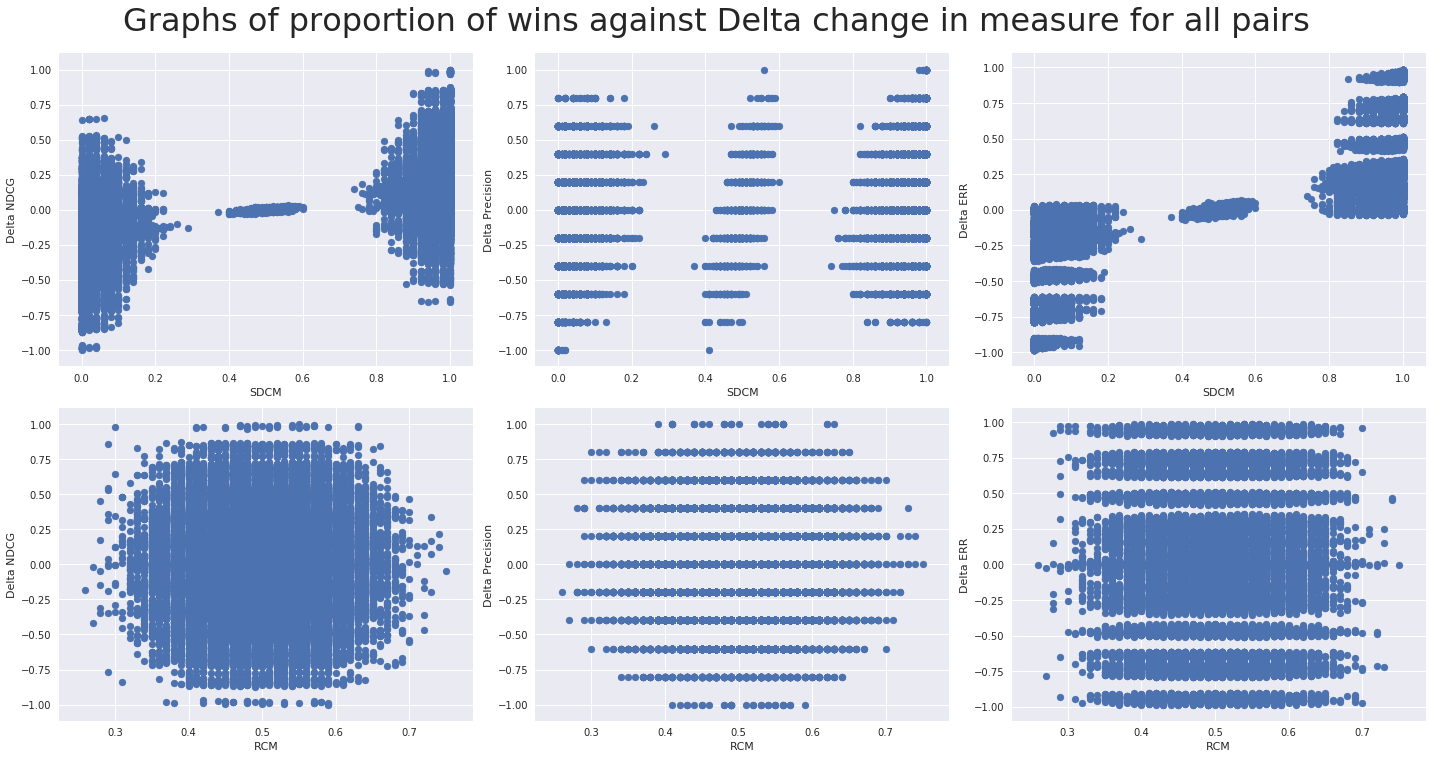

In [32]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10)) 
plt.suptitle("Graphs of proportion of wins against Delta change in measure for all pairs", y=1.05, size=32)

plt.subplot(2, 3, 1)
plt.scatter(sdcm_results,ndcgk_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta NDCG')

plt.subplot(2, 3, 2)
plt.scatter(sdcm_results,precisionk_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta Precision')

plt.subplot(2, 3, 3)
plt.scatter(sdcm_results,err_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta ERR')

plt.subplot(2, 3, 4)
plt.scatter(rcm_results,ndcgk_delta)
plt.xlabel('RCM')
plt.ylabel('Delta NDCG')

plt.subplot(2, 3, 5)
plt.scatter(rcm_results,precisionk_delta)
plt.xlabel('RCM')
plt.ylabel('Delta Precision')

plt.subplot(2, 3, 6)
plt.scatter(rcm_results,err_delta)
plt.xlabel('RCM')
plt.ylabel('Delta ERR')

plt.tight_layout()
plt.show()

The graphs above depict the delta in different measures with the respective click models. The top row shows the results of using different measure using the simple dependent click model. The second row similarly depicts the different measures with a random click model. The results of the random click models are as expected and they are distributed equally.

The results of the Simple dependent click model seem to have a desirable pattern. As we know from our experiments when a click model (x-axis) has a value higher than 0.5 then the click model favors the E algorithm while if the delta value is positive then the E model is favored by the algorithm. This implies that the top right corner and the bottom left corner of a given scatter plot contains the datapoints were the offline and online model agree with each other. The opposing areas (ie. top left and bottom right) are the data points were the two methods disagree with each other. The points which are close to the (0,0) coordinate are the datapoints which both methods have had a tie or have very small differences between the algorithms. 

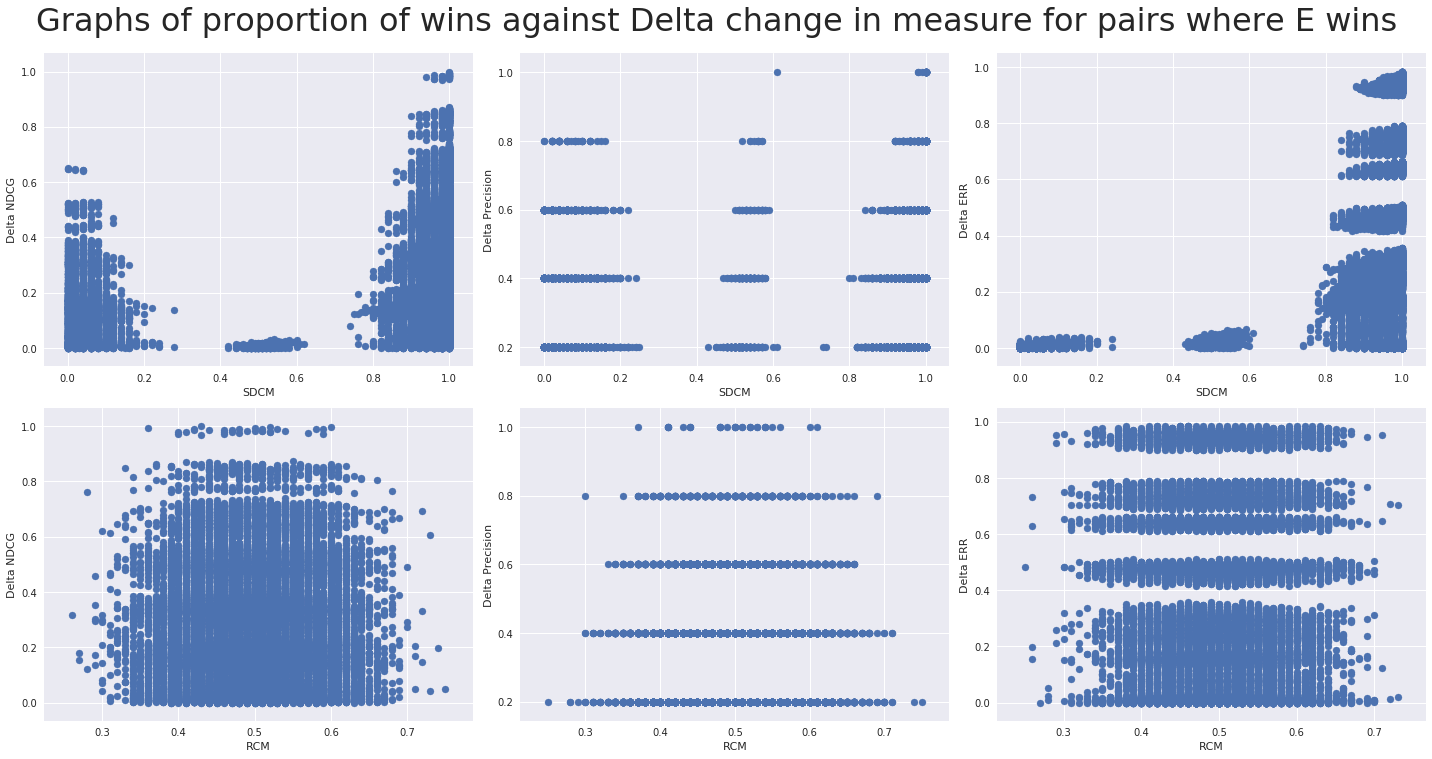

In [33]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10)) 
plt.suptitle("Graphs of proportion of wins against Delta change in measure for pairs where E wins", y=1.05, size=32)
plt.subplot(2, 3, 1)
plt.scatter(results['ndcgk']['sdcm'], ndcgk_E_winner_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta NDCG')

plt.subplot(2, 3, 2)
plt.scatter(results['precisionk']['sdcm'], precisionk_E_winner_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta Precision')

plt.subplot(2, 3, 3)
plt.scatter(results['err']['sdcm'], err_E_winner_delta)
plt.xlabel('SDCM')
plt.ylabel('Delta ERR')

plt.subplot(2, 3, 4)
plt.scatter(results['ndcgk']['rcm'], ndcgk_E_winner_delta)
plt.xlabel('RCM')
plt.ylabel('Delta NDCG')

plt.subplot(2, 3, 5)
plt.scatter(results['precisionk']['rcm'], precisionk_E_winner_delta)
plt.xlabel('RCM')
plt.ylabel('Delta Precision')

plt.subplot(2, 3, 6)
plt.scatter(results['err']['rcm'], err_E_winner_delta)
plt.xlabel('RCM')
plt.ylabel('Delta ERR')

plt.tight_layout()
plt.show()

The graphs above are similar to the ones that are depicted above. The difference here is that we are only considering datapoints in which we know that the E algorithm is better then the P algorithm using the offline methods. Here we can investigate the x-axis to see if the online measure is in agreement with the offline results.

In general, as above, we can see that the ERR gives the least amount of disagreements with the offline method. 

### Pearson's Correlation

(0.46994628836778951, 0.0)
(0.34444506249895762, 0.0)
(0.15871482507796852, 9.5309655490331077e-123)
(-0.011567989543282295, 0.047302652677283362)
(0.0042791778097660289, 0.52789096071356023)
(0.002542413008919523, 0.66288212539089142)


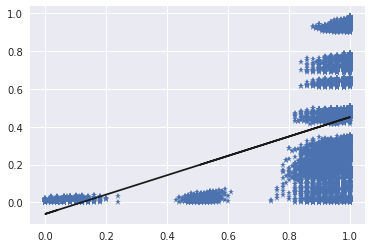

In [34]:
print(pearsonr(results['err']['sdcm'], err_E_winner_delta))
print(pearsonr(results['ndcgk']['sdcm'], ndcgk_E_winner_delta))
print(pearsonr(results['precisionk']['sdcm'], precisionk_E_winner_delta))

print(pearsonr(results['ndcgk']['rcm'], ndcgk_E_winner_delta))
print(pearsonr(results['precisionk']['rcm'], precisionk_E_winner_delta))
print(pearsonr(results['err']['rcm'], err_E_winner_delta))

#plt.plot(results['err']['sdcm'], err_E_winner_delta,'bo')
#plt.plot([-1,1])
#plt.xlabel('SDCM')
#plt.ylabel('Delta ERR')

x=results['err']['sdcm']
y=err_E_winner_delta
fit = polyfit(x, y, 1)
fit_fn = poly1d(fit)
plt.plot(x,y, '*', x, fit_fn(x), 'k')

plt.show()

The Pearson's correlation indicates the degree of which a relationship is linear. Finding the 'pearson' value, for each  biased pair of nDCG, ERR and Precision with the Click Models. We observe that the pair of ERR offline evaluation and SDCM model have the biggest pearson value(0.46) which mean that this pair has the strongest linear  association. This is labeled as MEDIUM linear correlation according to this https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php. A smaller linear correlation appears in nDCG and Precision compared with the SDCM. Finally the RCM shows no linear correlation. 

The plot with the scatter and linear regression for ERR pairs and SDCM also indicates the same results.

***Conclusions***

1. The ERR seems to be the best measure to show a good correlation between online and offline methods.
2. The Simple Dependency Click Model (SDCM) performs well in general.
3. Random Click Model (RCM) has no insight as it is just a base case.
4. We see that the majority is in agreement between online and offline method but this could be improved.
5. From the distribution of the p (proportion of E wins), we conclude that indeed there is a tendency in favor of E algorithm when we are based on the offline measurements, while no tendecy to be correlated when we are based to all the pairs. 
6. Pearson Correlation actually showed a medium linear association between the Δ values of offline evaluations (for E gains better scores than P at DCG, ERR, Precision) and the proportion of E wins under the Simple Dependant Click Model. This was an expected result,and it could be interpreted as that the SDCM performs good, as long as it opts E algorithm most of the times that ERR opts too (for which the relevance level is known).
